In [43]:
import pandas as pd

parsing = pd.read_excel('data/Data_TSUM.xlsx', sheet_name='Data_Parsing')
company = pd.read_excel('data/Data_TSUM.xlsx', sheet_name='Data_Company')

In [44]:
symbols = ['_', '~', '-', '\\', '/']
parsing['producer_color'] = parsing['producer_color'].apply(lambda x: x.replace('/', ''))
parsing['producer_color'] = parsing['producer_color'].apply(lambda x: x.replace('_', ''))
parsing['producer_color'] = parsing['producer_color'].apply(lambda x: x.replace('~', ''))
parsing['producer_color'] = parsing['producer_color'].apply(lambda x: x.replace('-', ''))
parsing['producer_color'] = parsing['producer_color'].apply(lambda x: x.replace('\\', ''))
parsing['producer_id'] = parsing['producer_id'].apply(lambda x: x.replace('_', ''))

parsing

,brand,Category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa111111,black,167
1,Valentino,Shoes,aaaaa111112,black,188
2,Valentino,Shoes,aaaaa111113,black,184
3,Valentino,Shoes,aaaaa111114,black,196
4,Valentino,Shoes,aaaaa111115,black,250
...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164
71,Stone Island,Bags,sssss111132,red,158
72,Stone Island,Bags,sssss111133,red,194
73,Stone Island,Bags,sssss111134,red,256


In [8]:
company

,brand,Category,item_id,color_id,current price
0,Valentino,Shoes,aaaaa111111,black,247
1,Valentino,Shoes,aaaaa111112,black,161
2,Valentino,Shoes,aaaaa111113,black,234
3,Valentino,Shoes,aaaaa111114,black,167
4,Valentino,Shoes,aaaaa111115,black,153
...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,165
71,Stone Island,Bags,sssss111132,red,196
72,Stone Island,Bags,sssss111133,red,236
73,Stone Island,Bags,sssss111134,red,222


In [53]:
merged = parsing.merge(
    company,
    how='left',
    left_on='producer_id',
    right_on='item_id'    
)
merged = merged.drop(['brand_y', 'Category_y', 'item_id', 'color_id'], axis=1)
merged['price_ratio'] = round(merged['price'] / merged['current price'] * 100, 1)
merged


,brand_x,Category_x,producer_id,producer_color,price,current price,price_ratio
0,Valentino,Shoes,aaaaa111111,black,167,247,67.6
1,Valentino,Shoes,aaaaa111112,black,188,161,116.8
2,Valentino,Shoes,aaaaa111113,black,184,234,78.6
3,Valentino,Shoes,aaaaa111114,black,196,167,117.4
4,Valentino,Shoes,aaaaa111115,black,250,153,163.4
...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164,165,99.4
71,Stone Island,Bags,sssss111132,red,158,196,80.6
72,Stone Island,Bags,sssss111133,red,194,236,82.2
73,Stone Island,Bags,sssss111134,red,256,222,115.3


In [54]:
merged['price_ratio'].describe()

count     75.000000
mean     102.657333
std       28.810706
min       58.000000
25%       81.150000
50%       96.300000
75%      117.900000
max      168.400000
Name: price_ratio, dtype: float64

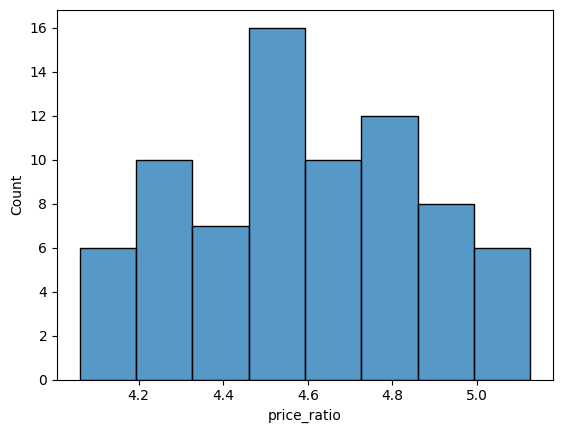

In [58]:
import seaborn as sns
import numpy as np
histplot = sns.histplot(
    np.log(merged['price_ratio'])
)


In [85]:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 1.5 * sigma
    upper_bound = mu + 1 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, cleaned = outliers_z_score(merged, 'price_ratio', log_scale=True)
outliers.shape[0]

18

In [102]:
outliers

,brand_x,Category_x,producer_id,producer_color,price,current price,price_ratio
4,Valentino,Shoes,aaaaa111115,black,250,153,163.4
7,Valentino,Shoes,aaaaa111118,white,162,265,61.1
10,Valentino,Shoes,aaaaa111121,white,171,292,58.6
12,Valentino,Shoes,aaaaa111123,white,288,171,168.4
16,Valentino,Bags,aaaaa111127,red,293,203,144.3
19,Valentino,Bags,aaaaa111130,red,173,287,60.3
20,Valentino,Bags,aaaaa111131,red,256,189,135.4
21,Valentino,Bags,aaaaa111132,red,170,293,58.0
24,Valentino,Bags,aaaaa111135,red,225,153,147.1
31,Brioni,Shoes,bbbbb111117,black,291,198,147.0


In [103]:
merged['outliers'] = 'no'

In [111]:
merged['outliers'] = merged['outliers'].apply(lambda x: 'yes' if x.index in outliers.index else x)
new_parcing = merged
new_parcing

,brand_x,Category_x,producer_id,producer_color,price,current price,price_ratio,outliers
0,Valentino,Shoes,aaaaa111111,black,167,247,67.6,no
1,Valentino,Shoes,aaaaa111112,black,188,161,116.8,no
2,Valentino,Shoes,aaaaa111113,black,184,234,78.6,no
3,Valentino,Shoes,aaaaa111114,black,196,167,117.4,no
4,Valentino,Shoes,aaaaa111115,black,250,153,163.4,yes
...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164,165,99.4,no
71,Stone Island,Bags,sssss111132,red,158,196,80.6,no
72,Stone Island,Bags,sssss111133,red,194,236,82.2,no
73,Stone Island,Bags,sssss111134,red,256,222,115.3,no


In [112]:
new_parcing.to_excel('data/parcing.xlsx', index=False)